# FORECASTING USEING FACEBOOK PROPHET MODEL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fbprophet
import warnings
%matplotlib inline
from fbprophet import Prophet

In [ ]:
df = pd.read_csv('/content/Inflation Rate  (montly) (1).csv')

In [ ]:
df.tail()

,year,inflation_rate
488,2020-09-30,5.7630
489,2020-10-31,5.7115
490,2020-11-30,5.6600
491,2020-12-31,5.6085
492,2021-01-31,5.5570


DROPING EXTRA VALUE

In [ ]:
df1=df.drop(df.index[492])

In [ ]:
df1.dtypes

ds    datetime64[ns]
y            float64
dtype: object

CHANGING COLUMN NAMES TO "ds" and "y"

In [ ]:
df1.columns=['ds','y']
df1.head()

,ds,y
0,1980-01-31,11.346
1,1980-02-29,11.455
2,1980-03-31,11.564
3,1980-04-30,11.673
4,1980-05-31,11.782


# visualization

In [ ]:
import plotly.express as px

fig = px.line(df1, x='ds', y='y', title='Line Plot of Inflation Dataset')
fig.show()

In [ ]:
df1['ds']=pd.to_datetime(df1.ds)

In [ ]:
df1.dtypes

ds    datetime64[ns]
y            float64
dtype: object

# BUILDING MODEL

In [ ]:
 model= Prophet()
 model.fit(df1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model

# FORECASTED INFLATION FIGURES FOR NEXT FIVE YEARS

In [ ]:
future=model.make_future_dataframe(periods=12 * 5, freq='M')

In [ ]:
df1.tail()

,ds,y
487,2020-08-31,5.8145
488,2020-09-30,5.7630
489,2020-10-31,5.7115
490,2020-11-30,5.6600
491,2020-12-31,5.6085


In [ ]:
future.tail()

,ds
547,2025-08-31
548,2025-09-30
549,2025-10-31
550,2025-11-30
551,2025-12-31


In [ ]:
forecast =model.predict(future)
forecast 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-01-31,9.922172,6.603541,12.943443,9.922172,9.922172,0.013197,0.013197,0.013197,0.013197,0.013197,0.013197,0.0,0.0,0.0,9.935369
1,1980-02-29,9.912640,6.894888,12.890900,9.912640,9.912640,0.008057,0.008057,0.008057,0.008057,0.008057,0.008057,0.0,0.0,0.0,9.920696
2,1980-03-31,9.902450,6.582031,13.237719,9.902450,9.902450,0.007944,0.007944,0.007944,0.007944,0.007944,0.007944,0.0,0.0,0.0,9.910394
3,1980-04-30,9.892589,6.705481,12.990296,9.892589,9.892589,0.010644,0.010644,0.010644,0.010644,0.010644,0.010644,0.0,0.0,0.0,9.903232
4,1980-05-31,9.882399,6.841337,12.911105,9.882399,9.882399,0.006686,0.006686,0.006686,0.006686,0.006686,0.006686,0.0,0.0,0.0,9.889085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,2025-08-31,5.038696,1.583059,8.092291,5.020823,5.057117,-0.004296,-0.004296,-0.004296,-0.004296,-0.004296,-0.004296,0.0,0.0,0.0,5.034400
548,2025-09-30,5.029994,1.713240,8.072415,5.011581,5.048799,-0.006467,-0.006467,-0.006467,-0.006467,-0.006467,-0.006467,0.0,0.0,0.0,5.023527
549,2025-10-31,5.021002,1.670632,8.384483,5.002111,5.040363,-0.008994,-0.008994,-0.008994,-0.008994,-0.008994,-0.008994,0.0,0.0,0.0,5.012008
550,2025-11-30,5.012300,1.868952,8.164950,4.992923,5.032328,-0.009913,-0.009913,-0.009913,-0.009913,-0.009913,-0.009913,0.0,0.0,0.0,5.002387


In [ ]:
pred1=forecast [['ds','yhat']]
pred1

,ds,yhat
0,1980-01-31,9.935369
1,1980-02-29,9.920696
2,1980-03-31,9.910394
3,1980-04-30,9.903232
4,1980-05-31,9.889085
...,...,...
547,2025-08-31,5.034400
548,2025-09-30,5.023527
549,2025-10-31,5.012008
550,2025-11-30,5.002387


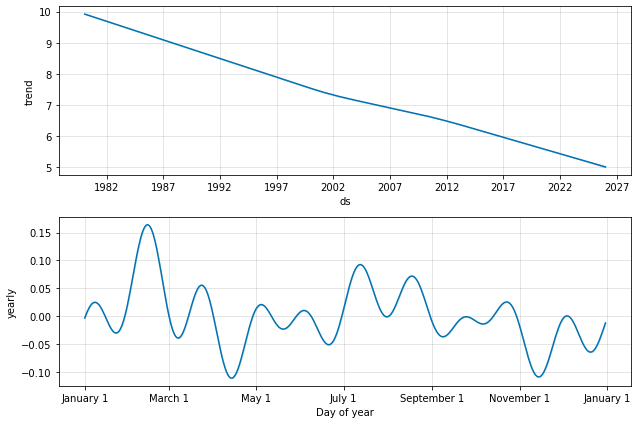

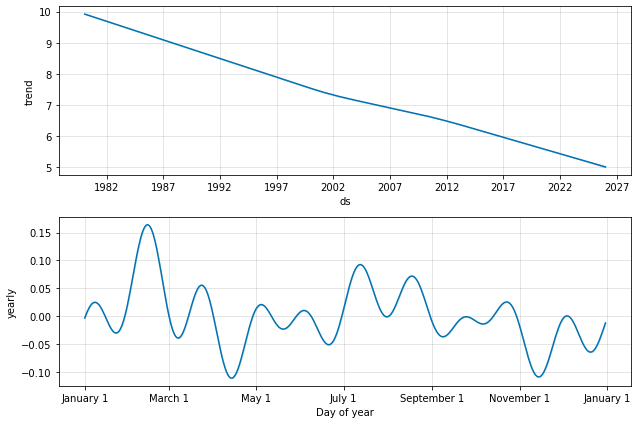

In [ ]:
model.plot_components(forecast)

In [ ]:
### Simple plot
# fig = m.plot(forecast)

### Using plot.ly
from fbprophet.plot import plot_plotly

plot_plotly(model, forecast)